In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv
from tensorflow import keras as k
import tensorflow as tf
import pathlib 
from matplotlib import pyplot as plt
from pathlib import Path
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization,SeparableConv2D
from warnings import filterwarnings
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint
from tensorflow.keras.utils import plot_model
filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

# VEIWING THE DATASET AND ANALYZING THE DATASET

In [2]:
train_path = "/kaggle/input/chest-xray-pneumonia/chest_xray/train"
test_path = "/kaggle/input/chest-xray-pneumonia/chest_xray/test"
val_path = "/kaggle/input/chest-xray-pneumonia/chest_xray/val"

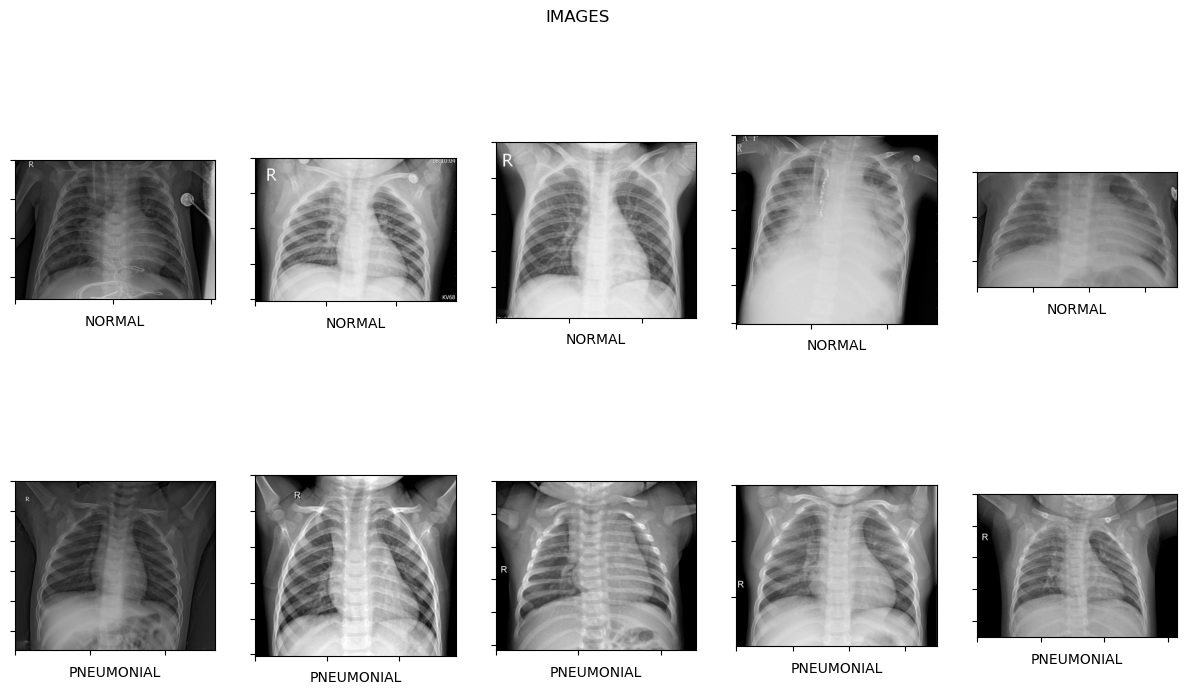

In [3]:
fig,axes = plt.subplots(nrows=2,ncols=5,figsize=(15,8))
train_path = Path(train_path)
paths = list(train_path.iterdir())
normal_train = Path(paths[0])
pneumonia_train = Path(paths[1])
rows=0
cols=0
normal_images = [str(i) for i in normal_train.iterdir()][:5]
diseas_images = [str(i) for i in pneumonia_train.iterdir()][:5]
for i in normal_images:
    img_data = cv.imread(i)
    axes[rows][cols].imshow(img_data)
    axes[rows][cols].axes.set_xticklabels([])
    axes[rows][cols].axes.set_yticklabels([])
    axes[rows][cols].axes.set_xlabel("NORMAL")
    cols+=1
rows+=1
cols=0
for i in diseas_images:
    img_data = cv.imread(i)
    axes[rows][cols].imshow(img_data)
    axes[rows][cols].axes.set_xticklabels([])
    axes[rows][cols].axes.set_yticklabels([])
    axes[rows][cols].axes.set_xlabel("PNEUMONIAL")
    cols+=1
fig.suptitle("IMAGES")
fig.show()

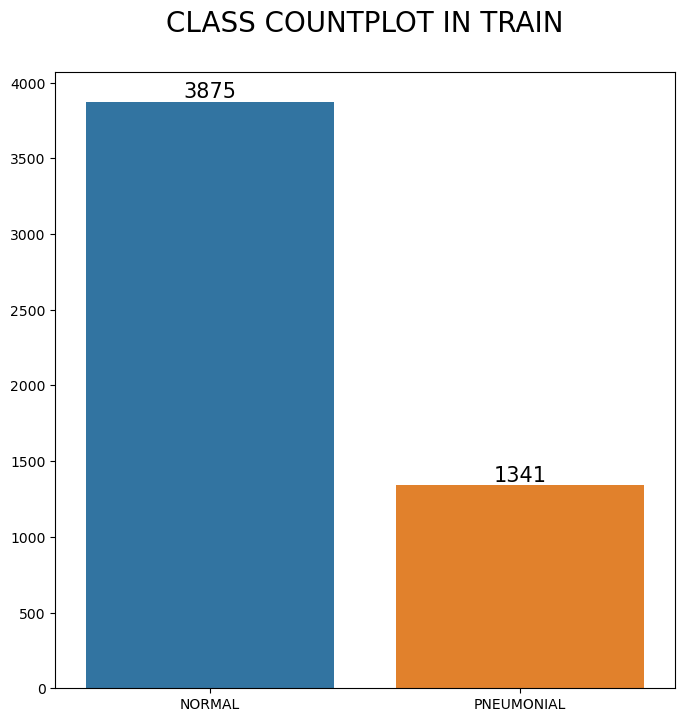

In [4]:
plt.figure(figsize=(8,8))
counts = {"NORMAL":sum(1 for i in normal_train.iterdir()),"PNEUMONIAL":sum(1 for i in pneumonia_train.iterdir())}
ax = sns.barplot(x = list(counts.keys()),y = list(counts.values()))
for i in ax.containers:
    ax.bar_label(i,fontsize=15)
plt.title("CLASS COUNTPLOT IN TRAIN\n",fontsize=20)
plt.show()

# GENERATING AND PREPROCESSING IMAGES

In [5]:
image_generator = k.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True
)

In [6]:
train= image_generator.flow_from_directory(train_path,
                                            batch_size=15,
                                            class_mode="binary",                                           
                                            shuffle=False,
                                            target_size=(224,224))
test = image_generator.flow_from_directory(test_path,
                                            batch_size=15,
                                           class_mode = "binary",                                        
                                            shuffle=False,
                                            target_size=(224,224))
val = image_generator.flow_from_directory(val_path,
                                            batch_size=15,
                                          class_mode = "binary",
                                            shuffle=False, 
                                            target_size=(224,224))

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


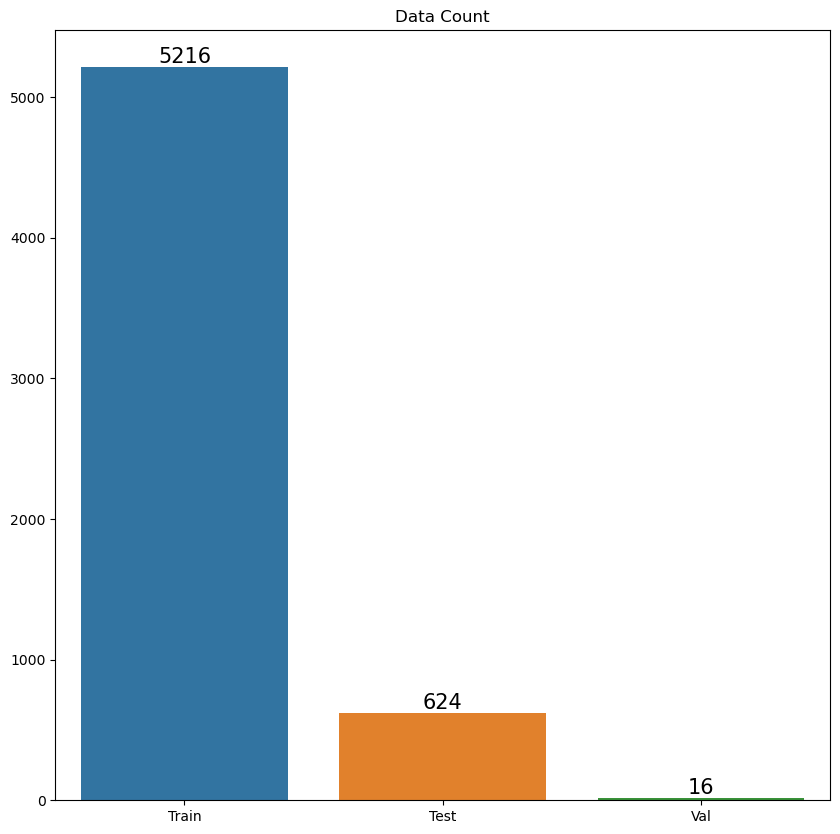

In [7]:
count_images = [train.samples,test.samples,val.samples]
text_count = ['Train','Test','Val']
fig,axes = plt.subplots(nrows=1,ncols=1,figsize = (10,10))
ax = sns.barplot(x = text_count,y=count_images,ax=axes)
for i in ax.containers:
    ax.bar_label(i,fontsize=15)
ax.set_title("Data Count")
plt.show()

In [17]:
train_labels = []
for i in range(len(train)):
    labels = train[i][1]
    train_labels.extend(labels.astype(np.int32))

In [18]:
test_labels = []
for i in range(len(test)):
    labels = test[i][1]
    test_labels.extend(labels.astype(np.int32))

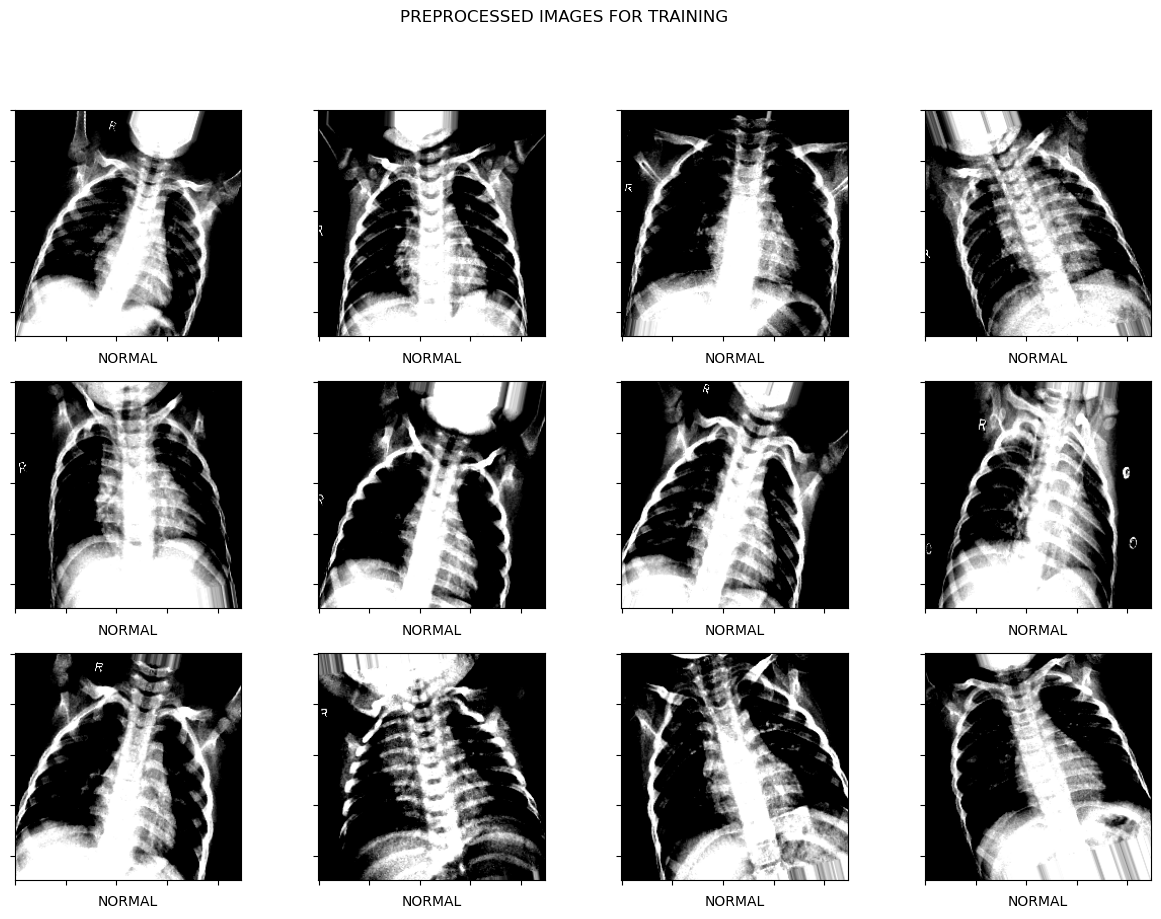

In [10]:
fig,axes = plt.subplots(nrows=3,ncols=4,figsize=(15,10))
labels = {1:"PNEUMONIAL",0:"NORMAL"}
cols=0
rows=0
for i in range(12):
    if i in [4,8]:
        rows+=1
        cols=0
    img_data,label = train.__getitem__(i)
    axes[rows][cols].imshow(img_data[0])
    axes[rows][cols].set_xticklabels([])
    axes[rows][cols].set_yticklabels([])
    axes[rows][cols].set_xlabel(labels[label[0]])
    cols+=1
fig.suptitle("PREPROCESSED IMAGES FOR TRAINING")
fig.show()

In [11]:
img_data,label = train.__getitem__(0)
print(f"The shape of each image in the dataset is {img_data[0].shape}")

The shape of each image in the dataset is (224, 224, 3)


# MODEL FORMULAITION

## MODEL 1

In [ ]:
cnn1 = Sequential()
cnn1.add(Conv2D(128, (4, 4), activation="sigmoid", input_shape=(224, 224, 3)))
cnn1.add(Conv2D(128, (4, 4), activation="sigmoid", input_shape=(224, 224, 3)))
cnn1.add(BatchNormalization())
cnn1.add(MaxPool2D(pool_size = (3, 3)))
cnn1.add(Conv2D(64, (3, 3), activation="sigmoid"))
cnn1.add(Conv2D(64, (3, 3), activation="sigmoid"))
cnn1.add(BatchNormalization())
cnn1.add(MaxPool2D(pool_size = (2, 2)))
cnn1.add(Conv2D(32, (3, 3), activation="tanh"))
cnn1.add(Conv2D(32, (3, 3), activation="tanh"))
cnn1.add(BatchNormalization())
cnn1.add(MaxPool2D(pool_size = (2, 2)))
cnn1.add(Flatten())
cnn1.add(Dense(activation = 'tanh', units = 256))
cnn1.add(Dropout(0.2))
cnn1.add(Dense(activation = 'sigmoid', units = 1))
optimizer = k.optimizers.SGD(learning_rate=0.01, momentum=0.9)
cnn1.compile(loss='binary_crossentropy', 
              optimizer=optimizer, 
              metrics=['accuracy'])
cnn1.summary()

In [ ]:
plot_model(cnn1,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

In [ ]:
hist = cnn1.fit_generator(
           train, 
           epochs=5, validation_data=val)

## MODEL EVALUVATION FOR MODEL 

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(8,4))
axes[0].plot(hist.history['loss'],label = 'train loss')
axes[0].plot(hist.history['val_loss'],label='validation loss')
axes[0].set_title("LOSS PLOT VAL AND TRAIN")
axes[1].plot(hist.history['accuracy'],label='train accuracy')
axes[1].plot(hist.history['val_accuracy'])
axes[1].set_title("ACCURACY PLOT VAL AND TRAIN")
plt.show()

In [43]:
prediction_test_1=cnn1.evaluate(test)
prediction_train_1 = cnn1.evaluate(train)

348/348 [==============================] - 125s 359ms/step - loss: 0.1863 - accuracy: 0.9385


In [ ]:
prediction_test_1[1],prediction_train_1[1] = prediction_test_1[1]*100,prediction_train_1[1]*100

In [ ]:
fig,axes = plt.subplots(nrows = 1, ncols = 2,figsize=(11,8))
label_dict = {1:'final accuracy plot',0:'final loss plot'}
axes_label = {1:['train accuracy','test accuracy'],0:['train loss','test loss']}
for i in range(2):
    s = sns.barplot(y=[prediction_train_1[i],prediction_test_1[i]],x=axes_label[i],ax=axes[i])
    for j in s.containers:
        s.bar_label(j,fontsize=15)
    axes[i].set_title(label_dict[i])

## MODEL 2 USING DIFFERENT PARAMETERS AND ACTIVATION FUNCTIONS

In [54]:
cnn = Sequential()
cnn.add(Conv2D(128, (4, 4), activation="relu", input_shape=(224, 224, 3)))
cnn.add(Conv2D(128, (4, 4), activation="relu"))
cnn.add(MaxPool2D(pool_size = (3, 3)))
cnn.add(BatchNormalization())
cnn.add(Conv2D(64, (3, 3), activation="relu"))
cnn.add(Conv2D(64, (3, 3), activation="relu"))
cnn.add(MaxPool2D(pool_size = (2, 2)))
cnn.add(BatchNormalization())
cnn.add(Conv2D(32, (3, 3), activation="relu"))
cnn.add(Conv2D(32, (3, 3), activation="relu"))
cnn.add(MaxPool2D(pool_size = (2, 2)))
cnn.add(BatchNormalization())
cnn.add(Flatten())
cnn.add(Dense(activation = 'relu', units = 256))
cnn.add(Dropout(0.2))
cnn.add(Dense(activation = 'sigmoid', units = 1))
cnn.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 221, 221, 128)     6272      
                                                                 
 conv2d_1 (Conv2D)           (None, 218, 218, 128)     262272    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 72, 72, 128)      0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 72, 72, 128)      512       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 70, 70, 64)        73792     
                                                                 
 conv2d_3 (Conv2D)           (None, 68, 68, 64)        3

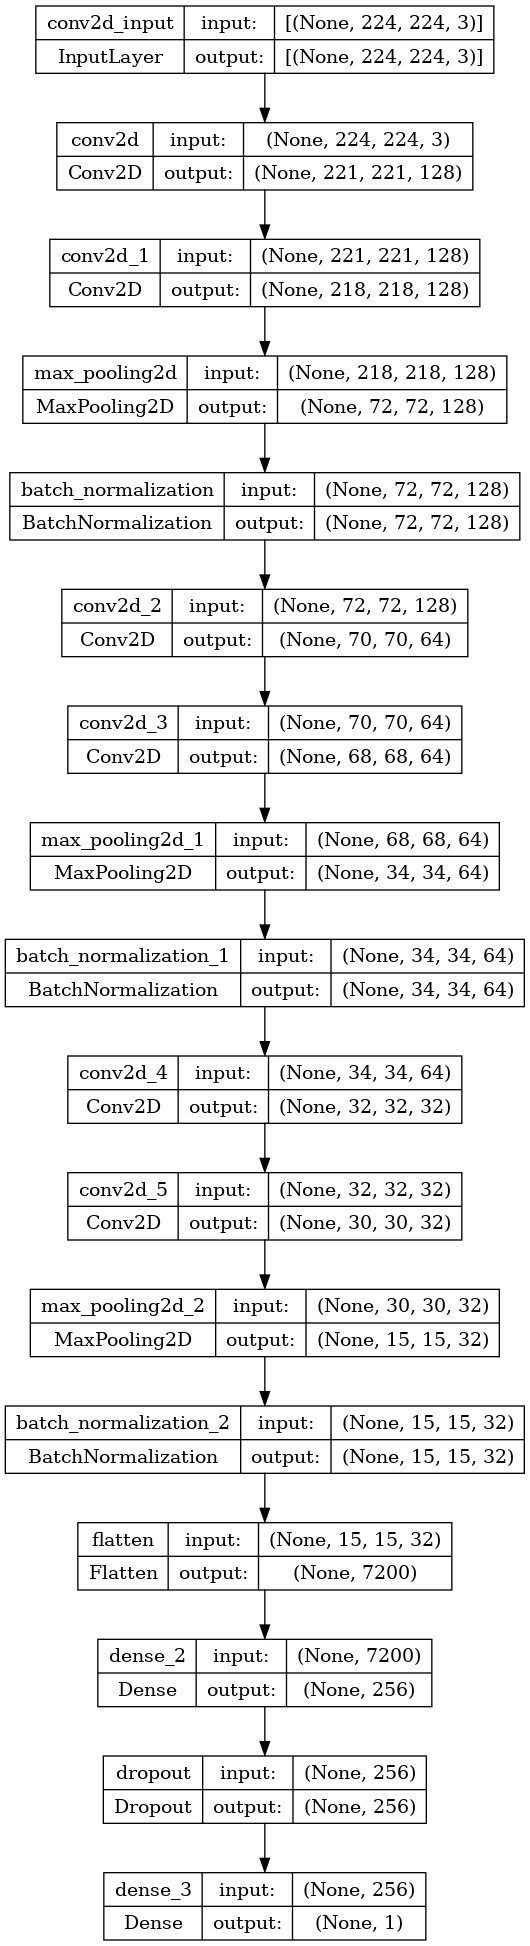

In [55]:
plot_model(cnn,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

In [ ]:
early = EarlyStopping(monitor="val_loss", mode="min", patience=3)
learning_rate_reduction = ReduceLROnPlateau(monitor="val_loss", patience = 2, verbose=1,factor=0.3, min_lr=0.000001)
callbacks_list = [ early, learning_rate_reduction]

In [ ]:
count_weightage = {0:counts['NORMAL']/(counts['NORMAL']+counts['PNEUMONIAL']),
                  1:counts['PNEUMONIAL']/(counts['NORMAL']+counts['PNEUMONIAL'])}
history = cnn.fit(train,epochs=10,
                  class_weight=count_weightage,
                  validation_data=val)

## MODEL EVALUVATION FOR MODEL 2

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(8,4))
axes[0].plot(history.history['loss'],label = 'train loss')
axes[0].plot(history.history['val_loss'],label='validation loss')
axes[0].set_title("LOSS PLOT VAL AND TRAIN")
axes[1].plot(history.history['accuracy'],label='train accuracy')
axes[1].plot(history.history['val_accuracy'])
axes[1].set_title("ACCURACY PLOT VAL AND TRAIN")
plt.show()

In [8]:
cnn = tf.keras.models.load_model("/kaggle/input/model2/Model1.h5")
prediction_test=cnn.evaluate(test)
prediction_train = cnn.evaluate(train)

 55/348 [===>..........................] - ETA: 2:51 - loss: 0.1091 - accuracy: 0.9636

KeyboardInterrupt: 

In [48]:
prediction_test[1],prediction_train[1] = prediction_test[1]*100,prediction_train[1]*100

In [ ]:
cnn.save('Model2.h5')

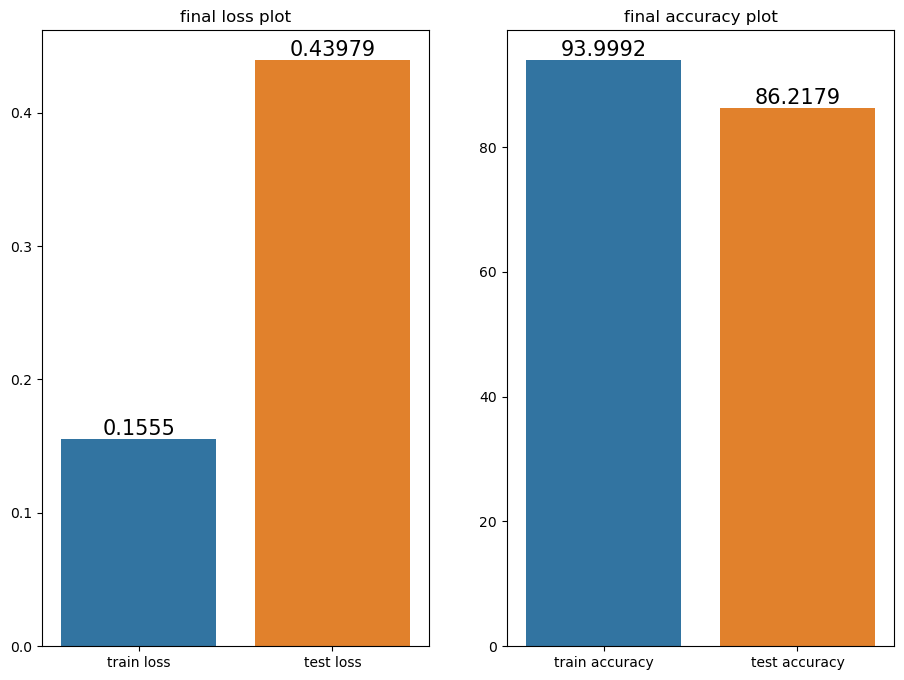

In [49]:
fig,axes = plt.subplots(nrows = 1, ncols = 2,figsize=(11,8))
label_dict = {1:'final accuracy plot',0:'final loss plot'}
axes_label = {1:['train accuracy','test accuracy'],0:['train loss','test loss']}
for i in range(2):
    s = sns.barplot(y=[prediction_train[i],prediction_test[i]],x=axes_label[i],ax=axes[i])
    for j in s.containers:
        s.bar_label(j,fontsize=15)
    axes[i].set_title(label_dict[i])

## CONFUSION_MATRICES FOR THE MODELS

In [7]:
cnn1 = tf.keras.models.load_model("/kaggle/input/model2/Model2.h5")
cnn = tf.keras.models.load_model("/kaggle/input/model2/Model1.h5")

test_predictions_1 = cnn1.predict(test)
train_predictions_1 = cnn.predict(train)

test_predictions_2 = cnn1.predict(test)
train_predictions_2 = cnn.predict(train) 

KeyboardInterrupt: 

In [22]:
test_predictions_1 = test_predictions_1>0.5
test_predictions_1 = test_predictions_1.astype(np.int64)
train_predictions_1 = train_predictions_1>0.5
train_predictions_1 = train_predictions_1.astype(np.int64)

In [23]:
test_predictions_2 = test_predictions_2>0.5
test_predictions_2 = test_predictions_2.astype(np.int64)
train_predictions_2 = train_predictions_2>0.5
train_predictions_2 = train_predictions_2.astype(np.int64)

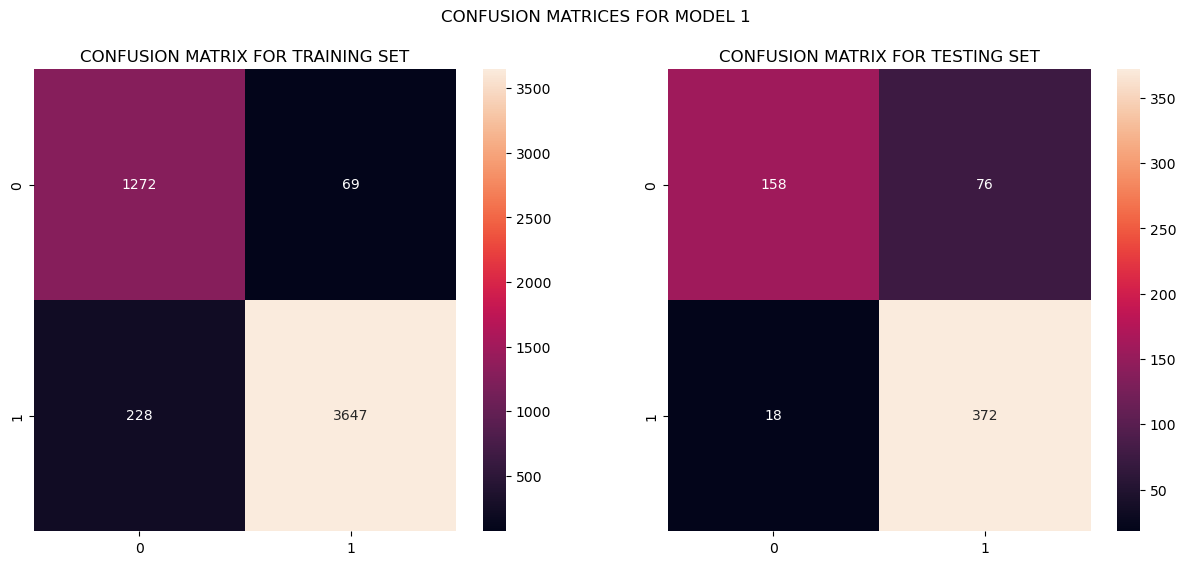

In [32]:
from sklearn.metrics import confusion_matrix
fig,axes = plt.subplots(nrows = 1,ncols = 2,figsize=(15,6))
f1 = sns.heatmap(confusion_matrix(train_labels,train_predictions_1),ax = axes[0],annot = True,fmt = "g")
f2 = sns.heatmap(confusion_matrix(test_labels,test_predictions_1),ax = axes[1],annot = True,fmt = "g")
axes[0].set_title("CONFUSION MATRIX FOR TRAINING SET")
axes[1].set_title("CONFUSION MATRIX FOR TESTING SET")
fig.suptitle("CONFUSION MATRICES FOR MODEL 1")
fig.show()

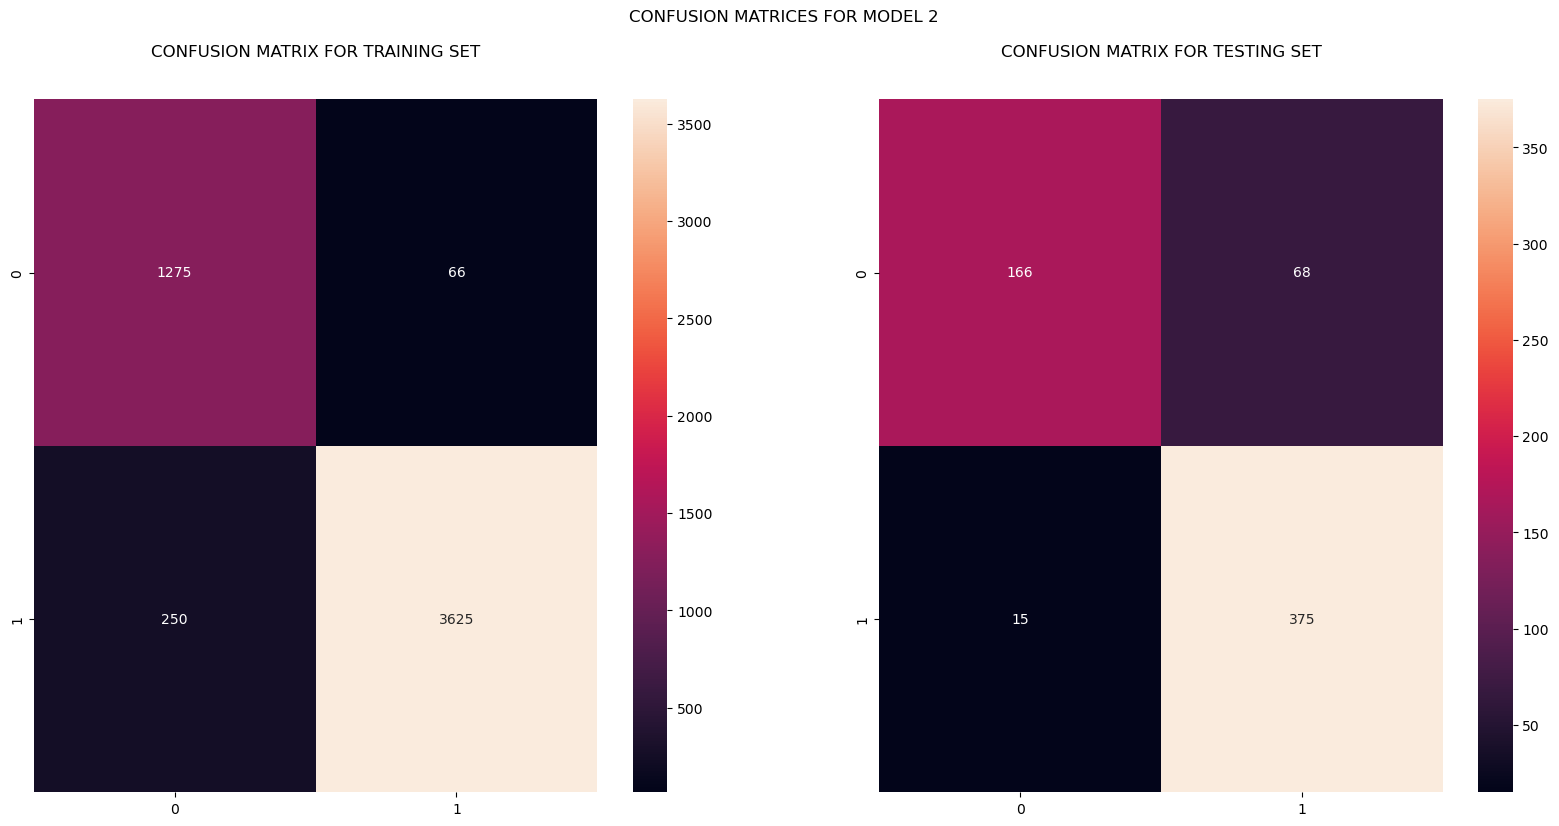

In [42]:
from sklearn.metrics import confusion_matrix
fig,axes = plt.subplots(nrows = 1,ncols = 2,figsize=(20,9))
f1 = sns.heatmap(confusion_matrix(train_labels,train_predictions_2),ax = axes[0],annot = True,fmt = "g")
f2 = sns.heatmap(confusion_matrix(test_labels,test_predictions_2),ax = axes[1],annot = True,fmt = "g")
axes[0].set_title("CONFUSION MATRIX FOR TRAINING SET\n\n")
axes[1].set_title("CONFUSION MATRIX FOR TESTING SET\n\n")
fig.suptitle("CONFUSION MATRICES FOR MODEL 2\n\n")
fig.show()

## USING TRANSFER LEARNING TO IMPROVE THE MODEL

In [9]:
transfer_model = tf.keras.applications.VGG19(
weights="imagenet",
include_top=False
)
for layer in transfer_model.layers:
    layer.trainable = False
final = transfer_model.output
final = tf.keras.layers.GlobalAveragePooling2D()(final)
final = tf.keras.layers.Dense(256,activation = "relu")(final)
predictions = tf.keras.layers.Dense(1,activation="sigmoid")(final)
transfer_model = tf.keras.models.Model(inputs=transfer_model.inputs,outputs=predictions)

80134624/80134624 [==============================] - 0s 0us/step


In [10]:
transfer_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [11]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',patience=8)
transfer_model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [12]:
hist = transfer_model.fit(train,validation_data=val,epochs = 8)

Epoch 1/8
348/348 [==============================] - 143s 399ms/step - loss: 0.3795 - accuracy: 0.8204 - val_loss: 0.7160 - val_accuracy: 0.6875
Epoch 2/8
348/348 [==============================] - 113s 325ms/step - loss: 0.2292 - accuracy: 0.9103 - val_loss: 0.6388 - val_accuracy: 0.6250
Epoch 3/8
348/348 [==============================] - 112s 321ms/step - loss: 0.2093 - accuracy: 0.9164 - val_loss: 0.6738 - val_accuracy: 0.6250
Epoch 4/8
348/348 [==============================] - 112s 322ms/step - loss: 0.2031 - accuracy: 0.9191 - val_loss: 0.7451 - val_accuracy: 0.6250
Epoch 5/8
348/348 [==============================] - 114s 328ms/step - loss: 0.1734 - accuracy: 0.9300 - val_loss: 0.9581 - val_accuracy: 0.6250
Epoch 6/8
348/348 [==============================] - 113s 324ms/step - loss: 0.1579 - accuracy: 0.9375 - val_loss: 0.6698 - val_accuracy: 0.8125
Epoch 7/8
348/348 [==============================] - 112s 321ms/step - loss: 0.1378 - accuracy: 0.9461 - val_loss: 1.0659 - val_ac

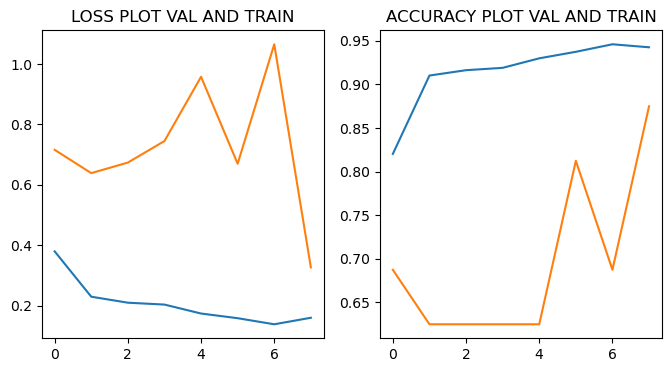

In [13]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(8,4))
axes[0].plot(hist.history['loss'],label = 'train loss')
axes[0].plot(hist.history['val_loss'],label='validation loss')
axes[0].set_title("LOSS PLOT VAL AND TRAIN")
axes[1].plot(hist.history['accuracy'],label='train accuracy')
axes[1].plot(hist.history['val_accuracy'])
axes[1].set_title("ACCURACY PLOT VAL AND TRAIN")
plt.show()

In [14]:
transfer_prediction_test=transfer_model.evaluate(test)
transfer_prediction_train = transfer_model.evaluate(train)
transfer_prediction_test[1],transfer_prediction_train[1] = transfer_prediction_test[1]*100,transfer_prediction_train[1]*100

348/348 [==============================] - 113s 323ms/step - loss: 0.2068 - accuracy: 0.9191


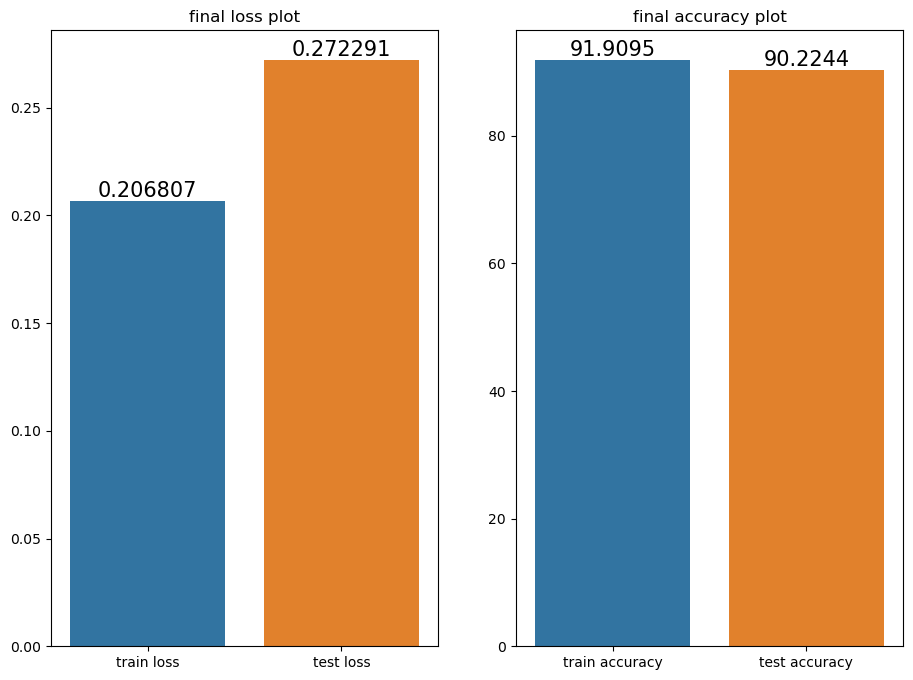

In [15]:
fig,axes = plt.subplots(nrows = 1, ncols = 2,figsize=(11,8))
label_dict batch_size='final accuracy plot',0:'final loss plot'}
axes_label = {1:['train accuracy','test accuracy'],0:['train loss','test loss']}
for i in range(2):
    s = sns.barplot(y=[transfer_prediction_train[i],transfer_prediction_test[i]],x=axes_label[i],ax=axes[i])
    for j in s.containers:
        s.bar_label(j,fontsize=15)
    axes[i].set_title(label_dict[i])

In [22]:
transfer_predictions_train = transfer_model.predict(train)
transfer_predictions_train = transfer_predictions_train>0.5
transfer_predictions_train = transfer_predictions_train.astype(np.int64)
transfer_predictions_test = transfer_model.predict(test)
transfer_predictions_test = transfer_predictions_test>0.5
transfer_predictions_test = transfer_predictions_test.astype(np.int64)

42/42 [==============================] - 12s 293ms/step


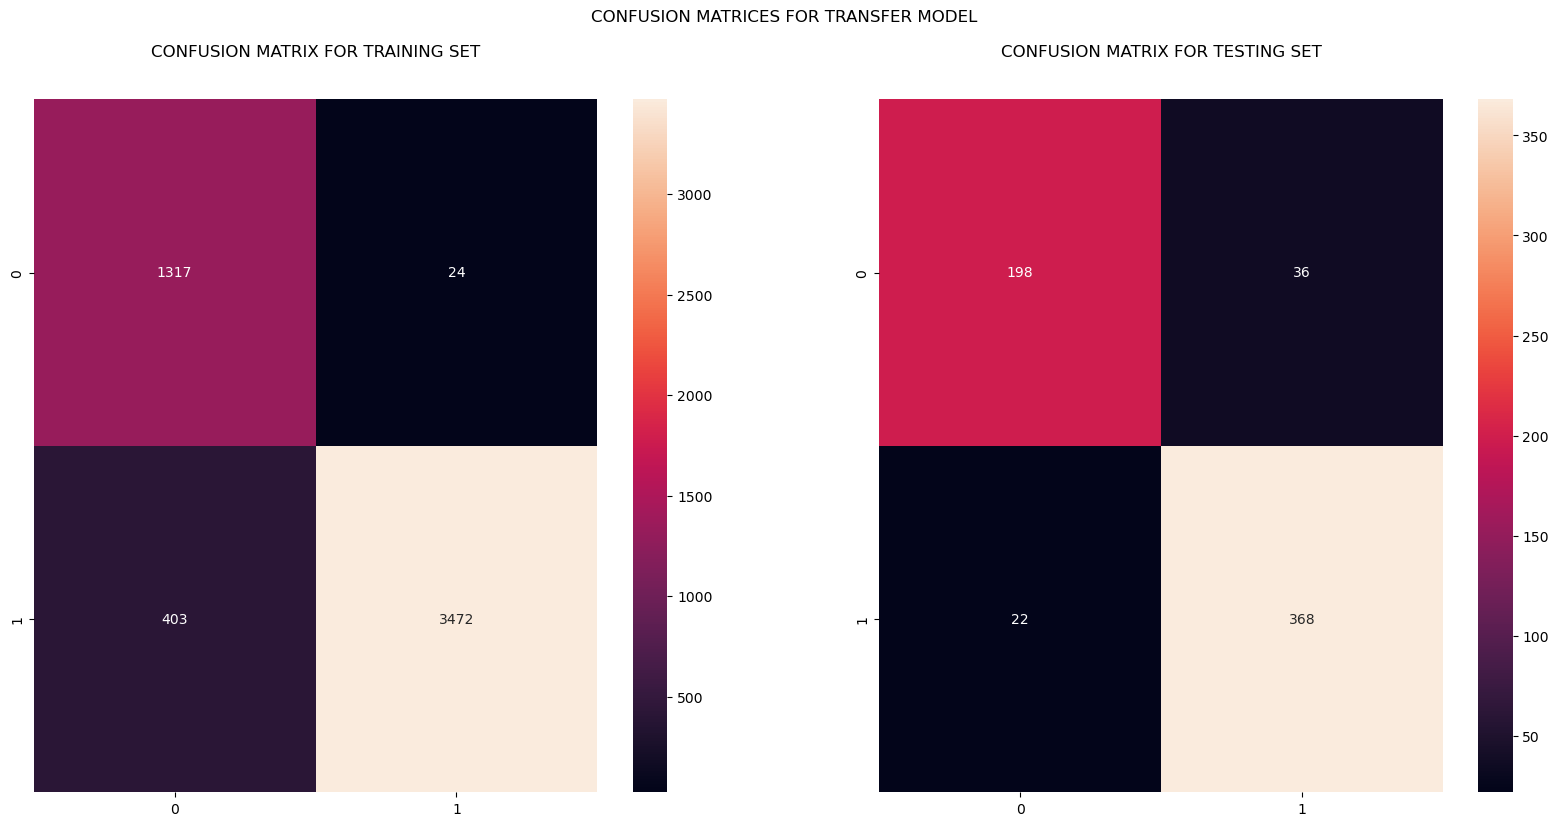

In [25]:
from sklearn.metrics import confusion_matrix
fig,axes = plt.subplots(nrows = 1,ncols = 2,figsize=(20,9))
f1 = sns.heatmap(confusion_matrix(train_labels,transfer_predictions_train),ax = axes[0],annot = True,fmt = "g")
f2 = sns.heatmap(confusion_matrix(test_labels,transfer_predictions_test),ax = axes[1],annot = True,fmt = "g")
axes[0].set_title("CONFUSION MATRIX FOR TRAINING SET\n\n")
axes[1].set_title("CONFUSION MATRIX FOR TESTING SET\n\n")
fig.suptitle("CONFUSION MATRICES FOR TRANSFER MODEL\n\n")
fig.show()

In [120]:
def predict(image_path,cnn):
    image = cv.imread(image_path)
    image = cv.resize(image,(224,224))
    image = np.array([image])
    image_array = image / 255.0
    image_array -= image_array.mean()
    image_array /= image_array.std()
    print("PNEUMONIAL" if cnn1.predict(image_array)[0][0]>0.5 else "NORMAL")

In [121]:
NORMAL_PATH = "/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0001-0001.jpeg"
PNEUMONIAL_PATH = "/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person100_bacteria_477.jpeg"

In [122]:
predict(NORMAL_PATH,cnn1)
predict(PNEUMONIAL_PATH,cnn1)

1/1 [==============================] - 0s 21ms/step
NORMAL
1/1 [==============================] - 0s 19ms/step
PNEUMONIAL


In [123]:
transfer_model.save("transfer learning.h5")